### What are N-Grams?

The main goal of N-grams in NLP is to capture local word dependencies and contextual patterns in text by analyzing sequences of N consecutive words.

An N-Gram is just a group of N words that appear next to each other in a sentence.

that is a contiguous sequence of **N items** (usually words or characters) from a given text or speech corpus.



- Unigram: 1-gram (e.g., "I", "love", "pizza")
- Bigram: 2-gram (e.g., "I love", "love pizza")
- Trigram: 3-gram (e.g., "I love pizza")

We use N-Grams to help computers understand how words go together.

***Simplified examples:***

**Autocomplete:** When you type "I want to", it predicts "sleep" because "I want to sleep" is common.

**Spellcheck:** If you type "I no the answer", the system may suggest "I know the answer".

Think of N-Grams like `LEGO` blocks made of words. We look at how blocks connect to build the meaning of sentences.

N-Grams help us to learn the computer to guess the next word, based on what words came before.


### Historical Context

N-Gram models were popularized in the 1940s by **Claude Shannon**, a pioneer of information theory. 

They gained wide use in speech recognition, machine translation, and language modeling throughout the 20th century.

Before deep learning models (like Transformers), **statistical language models** based on N-Grams were standard in many NLP applications.

#### Key Milestones:
- 1948: Claude Shannon's "A Mathematical Theory of Communication"
- 1980s–2000s: Widespread use in speech recognition systems
- 1990s: N-Gram models used in search engines and spelling correction



### Mathematical Background

In **mathematical/statistical terms**, N-grams are interpreted using **probability theory** and **count-based models**, primarily through the concept of **conditional probability** and **Markov assumptions**.


### **1. Probability Representation**
An N-gram model estimates the probability of a word $w_i$ given its preceding $N-1$ words. For example:
- **Unigram (1-gram)**: $P(w_i)$ (no context, just word frequency).
- **Bigram (2-gram)**: $P(w_i \mid w_{i-1})$ (probability of $w_i$ given the previous word).
- **Trigram (3-gram)**: $P(w_i \mid w_{i-2}, w_{i-1})$, and so on.

#### **General N-gram Probability**:
$P(w_i \mid w_{i-N+1}, \dots, w_{i-1})$, this is the probability of word $w_i$ given the previous $N-1$ words.

### **2. Maximum Likelihood Estimation (MLE)**
The probability is computed from **relative word counts** in a corpus:
$P(w_i \mid w_{i-N+1}, \dots, w_{i-1}) = \frac{\text{Count}(w_{i-N+1}, \dots, w_i)}{\text{Count}(w_{i-N+1}, \dots, w_{i-1})}$

**Example (Bigram)**: $P(\text{"York"} \mid \text{"New"}) = \frac{\text{Count("New York")}}{\text{Count("New")}}$


### **3. Markov Assumption**
N-gram models rely on the **Markov Property**, which assumes that the probability of a word depends 

**only on the previous $N-1$ words**, not the entire history:
$P(w_i \mid w_1, w_2, \dots, w_{i-1}) \approx P(w_i \mid w_{i-N+1}, \dots, w_{i-1})$
- This simplifies computation but loses long-range dependencies.


### **4. Smoothing Techniques (Handling Sparsity)**
Since many N-grams are rare or unseen in training data, smoothing methods adjust probabilities to avoid zero counts:
- **Laplace (Add-1) Smoothing**:
$P(w_i \mid w_{i-1}) = \frac{\text{Count}(w_{i-1}, w_i) + 1}{\text{Count}(w_{i-1}) + V}$ where $V = \text{vocabulary size}$.

- **Good-Turing, Kneser-Ney, or Backoff** methods improve estimates for rare/unseen N-grams.


### **5. Log Probabilities & Perplexity**
- **Log probabilities** are often used to avoid underflow in long sequences:
  $\log P(w_1, \dots, w_n) = \sum_{i=1}^n \log P(w_i \mid w_{i-N+1}, \dots, w_{i-1})$
- **Perplexity** measures how well the model predicts a test set (lower = better):
  $\text{Perplexity} = \exp\left( -\frac{1}{M} \sum_{i=1}^M \log P(w_i \mid \text{context}) \right)$ where $M = \text{total words}$.


### **6. Applications in Statistical NLP**
- **Language Modeling**: Predict next word in speech recognition, autocomplete.
- **Text Classification**: N-gram features in Naive Bayes, SVMs.
- **Machine Translation**: Aligning phrases (e.g., "c'est la vie" → "that's life").



### **Key Takeaways**
- N-grams are **count-based probabilistic models**.
- They use **conditional probability** with a **Markov assumption**.
- **Smoothing** is crucial to handle unseen data.
- Log probabilities and perplexity help evaluate performance.

### N-Gram Implementation in Python

In [2]:
import re
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Synthetic text with clear repetition
text = """
The quick brown fox jumps over the lazy dog. The quick brown fox is very quick. 
Every fox is quick when the quick fox runs. The lazy dog sleeps when the fox jumps. 
The quick brown fox and the lazy dog are friends. The fox is always quick and clever.
"""

# Tokenize and clean
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if re.match(r'\w+', t)]

# Show total words
print(f"Total tokens: {len(tokens)}")

# Generate bigrams and trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Frequency distributions
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Top bigrams
print("\nTop 10 Bigrams:")
for bg, freq in bigram_freq.most_common(10):
    print(f"{' '.join(bg)}: {freq}")

# Top trigrams
print("\nTop 10 Trigrams:")
for tg, freq in trigram_freq.most_common(10):
    print(f"{' '.join(tg)}: {freq}")


Total tokens: 50

Top 10 Bigrams:
the quick: 4
quick brown: 3
brown fox: 3
the lazy: 3
lazy dog: 3
fox is: 3
fox jumps: 2
when the: 2
the fox: 2
jumps over: 1

Top 10 Trigrams:
the quick brown: 3
quick brown fox: 3
the lazy dog: 3
brown fox jumps: 1
fox jumps over: 1
jumps over the: 1
over the lazy: 1
lazy dog the: 1
dog the quick: 1
brown fox is: 1


### Visualization of N-Gram Frequencies

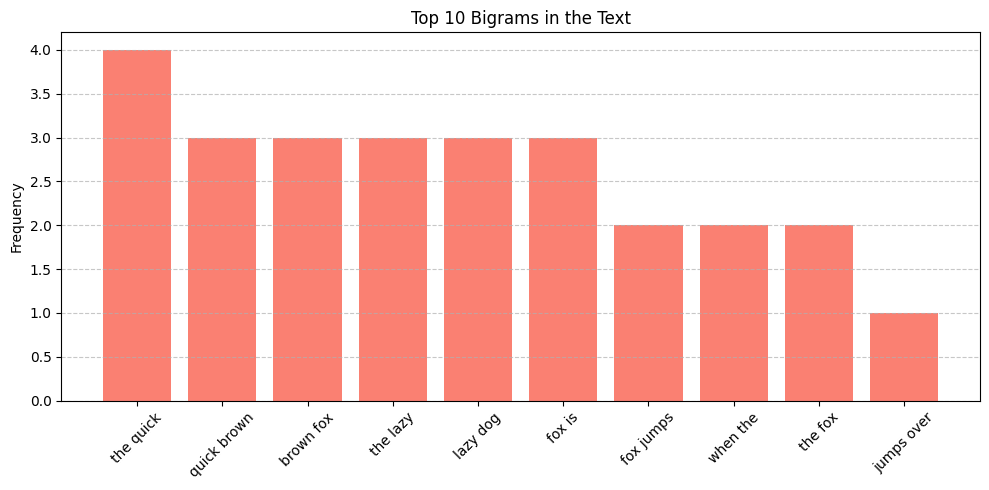

In [3]:
# Top bigrams visualization
top_bigrams = bigram_freq.most_common(10)
labels, counts = zip(*top_bigrams)
labels = [' '.join(b) for b in labels]

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='salmon')
plt.title("Top 10 Bigrams in the Text")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Build N-Gram Language Model (Simple Example)

In [4]:
def build_ngram_model(tokens, n):
    model = {}
    for ngram in ngrams(tokens, n):
        prefix = ngram[:-1]
        next_word = ngram[-1]
        if prefix not in model:
            model[prefix] = []
        model[prefix].append(next_word)
    return model

# Trigram model
trigram_model = build_ngram_model(tokens, 3)
print("Trigram model example:")
for k, v in list(trigram_model.items())[:3]:
    print(f"{k} → {v}")


Trigram model example:
('the', 'quick') → ['brown', 'brown', 'fox', 'brown']
('quick', 'brown') → ['fox', 'fox', 'fox']
('brown', 'fox') → ['jumps', 'is', 'and']


### **Foundational Papers & Books**
1. **Shannon, C. E. (1948)**  
   - *"A Mathematical Theory of Communication"* (Bell System Technical Journal).  
   - Introduces the concept of **n-gram-like word sequences** for entropy estimation in language.  
   - [DOI:10.1002/j.1538-7305.1948.tb01338.x](https://doi.org/10.1002/j.1538-7305.1948.tb01338.x)

2. **Jelinek, F., & Mercer, R. L. (1980)**  
   - *"Interpolated Estimation of Markov Source Parameters from Sparse Data"* (IBM Research).  
   - Introduces **smoothing techniques** (e.g., interpolation) for n-gram models.  
   - [Link](https://ieeexplore.ieee.org/document/4767270)

3. **Kneser, R., & Ney, H. (1995)**  
   - *"Improved Backing-Off for M-gram Language Modeling"* (ICASSP).  
   - Proposes **Kneser-Ney smoothing**, widely used in n-gram models.  
   - [DOI:10.1109/ICASSP.1995.479394](https://doi.org/10.1109/ICASSP.1995.479394)

4. **Manning, C. D., & Schütze, H. (1999)**  
   - *"Foundations of Statistical Natural Language Processing"* (MIT Press).  
   - Chapter 6 covers **n-gram models, MLE, and smoothing** in detail.  
   - [Book Link](https://nlp.stanford.edu/fsnlp/)
5. **Manning, C. D., Raghavan, P., & Schütze, H. (2008)***
   - *"Introduction to Information Retrieval"*. Cambridge University Press.


### **Statistical Methods & Smoothing**
5. **Chen, S. F., & Goodman, J. (1996)**  
   - *"An Empirical Study of Smoothing Techniques for Language Modeling"* (Harvard Tech Report).  
   - Compares **Laplace, Good-Turing, Kneser-Ney**, and other methods.  
   - [PDF](https://arxiv.org/abs/cmp-lg/9606011)

6. **Gale, W. A., & Sampson, G. (1995)**  
   - *"Good-Turing Smoothing Without Tears"* (Journal of Quantitative Linguistics).  
   - Simplifies Good-Turing estimation for n-grams.  
   - [DOI:10.1080/09296179508590051](https://doi.org/10.1080/09296179508590051)


### **Applications & Extensions**
7. **Brants, T., et al. (2007)**  
   - *"Large Language Models in Machine Translation"* (EMNLP).  
   - Uses **trigram models** in Google’s early MT systems.  
   - [PDF](https://aclanthology.org/D07-1090.pdf)

8. **Mikolov, T., et al. (2010)**  
   - *"Recurrent Neural Network Based Language Model"* (INTERSPEECH).  
   - Compares **n-grams vs. neural LMs** (transition from statistical to neural methods).  
   - [PDF](https://www.fit.vutbr.cz/research/groups/speech/publi/2010/mikolov_interspeech2010_IS100722.pdf)


### **Critiques & Limitations**
9. **Banko, M., & Brill, E. (2001)**  
   - *"Scaling to Very Very Large Corpora for Natural Language Disambiguation"* (ACL).  
   - Shows how **n-grams fail to scale** compared to other methods.  
   - [PDF](https://aclanthology.org/P01-1005.pdf)

10. **Bengio, Y., et al. (2003)**  
   - *"A Neural Probabilistic Language Model"* (JMLR).  
   - Introduces **neural LMs** to address n-gram sparsity.  
   - [DOI:10.5555/944919.944966](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

### **Textbooks for Further Study**
- **Jurafsky, D., & Martin, J. H. (2023)**  
  - *"Speech and Language Processing"* (3rd Ed., Pearson).  
  - Chapters 3–4 cover **n-grams, smoothing, and evaluation** (Perplexity).  
  - [Book Website](https://web.stanford.edu/~jurafsky/slp3/)

- **Bishop, C. M. (2006)**  
  - *"Pattern Recognition and Machine Learning"* (Springer).  
  - Discusses **Markov models** (the statistical basis of n-grams).  